QUICK SORT VS MODIFIED QUICK SORT

In [12]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd
import sys


In [13]:
Total_execution = [0,0,0,0,0,0]
Compare = [0,0,0,0,0,0]
swap = [0,0,0,0,0,0]
space = [0,0,0,0,0,0]
swaps = 0
comparisons = 0


In [14]:
def partition(arr, low, high):
    global swaps, comparisons  # Use global variables

    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        comparisons += 1  # Increment comparisons count
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            swaps += 1  # Increment swaps count
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    swaps += 1  # Increment swaps count
    return i + 1

In [15]:
def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index - 1)
        quick_sort(arr, pivot_index + 1, high)



Input Size: 10000
Execution Time: 0.06654459997662343 seconds
Number of Swaps: 49725
Number of Comparisons: 579600
------------------------------


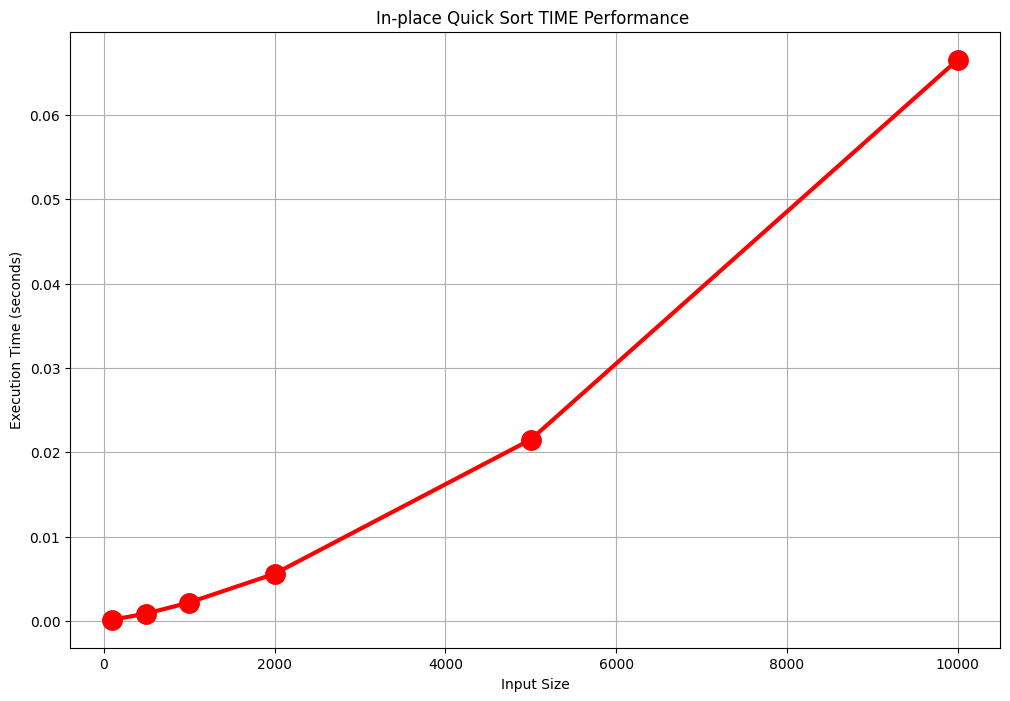

In [16]:
def qs_analyze_time(input_sizes):
    global swaps, comparisons
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global swaps, comparisons
        swaps = 0
        comparisons = 0

        start_time = time.perf_counter()
        quick_sort(arr, 0, len(arr) - 1)
        
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
        swaplist.append(swaps)
        comparelist.append(comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        
    Total_execution[0]=execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {swaps}")
    print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[0] = swaplist
    Compare[0] = comparelist
    space[0] =space_used
    return execution_times
    
input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = qs_analyze_time(input_sizes)
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14,linewidth = 3)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort TIME Performance ')
plt.grid(True)
plt.show()

MODIFIED QUICK SORT


In [17]:
def insertion_sort(arr, low, high):
    for i in range(low + 1, high + 1):
        key = arr[i]
        j = i - 1
        while j >= low and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def partition(arr, low, high):
    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort_wrap(arr, low, high,threshold=10):
    """
    Sort the arr in place using quick sort algorithm. 
    In-place quick sort with Randomized pivot selection

    1. Optimize it with insertion sort for small subarr in our case its 10 and randomize the pivot selection.
    """
    

    if low < high:
        if high - low < threshold:
            insertion_sort(arr, low, high)
            
        else:
             
            pivot = partition(arr, low, high)
            quick_sort_wrap(arr, low, pivot - 1)
            quick_sort_wrap(arr, pivot + 1, high)





Input Size: 10000
Execution Time: 0.04016949998913333 seconds
------------------------------


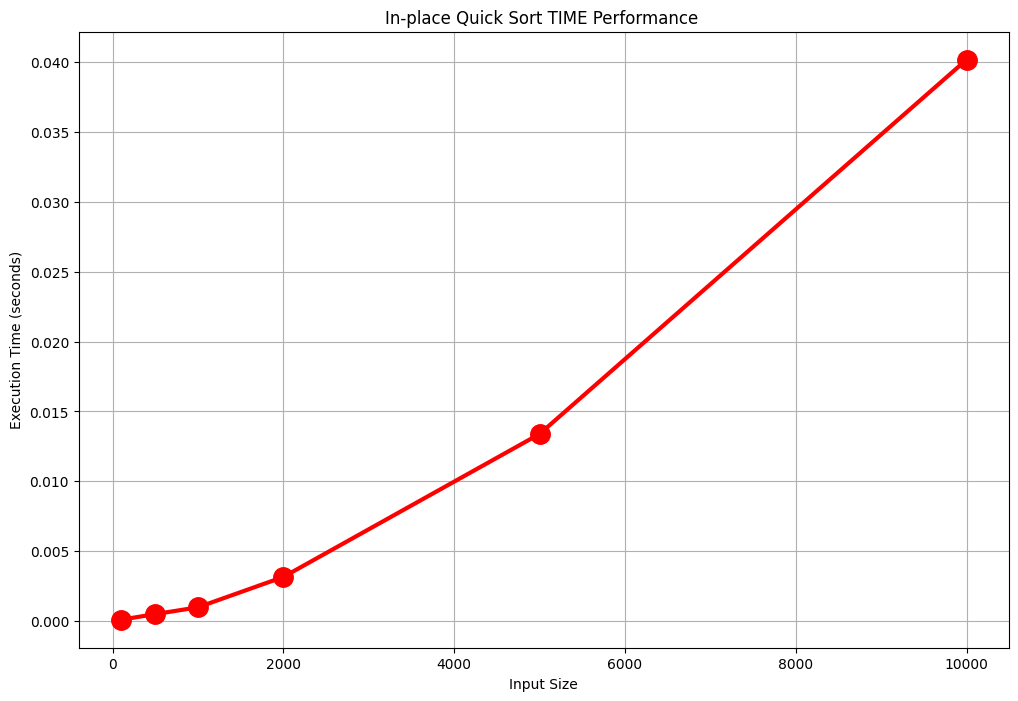

In [18]:
def qsMOD_analyze_time(input_sizes):
    global swaps, comparisons
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global swaps, comparisons
        swaps = 0
        comparisons = 0

        start_time = time.perf_counter()
        quick_sort_wrap(arr, 0, len(arr) - 1)
        
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
        swaplist.append(swaps)
        comparelist.append(comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        
    Total_execution[1]=execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    # print(f"Number of Swaps: {swaps}")
    # print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[0] = swaplist
    Compare[0] = comparelist
    space[0] =space_used
    return execution_times
    
input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = qsMOD_analyze_time(input_sizes)
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14,linewidth = 3)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort TIME Performance ')
plt.grid(True)
plt.show()

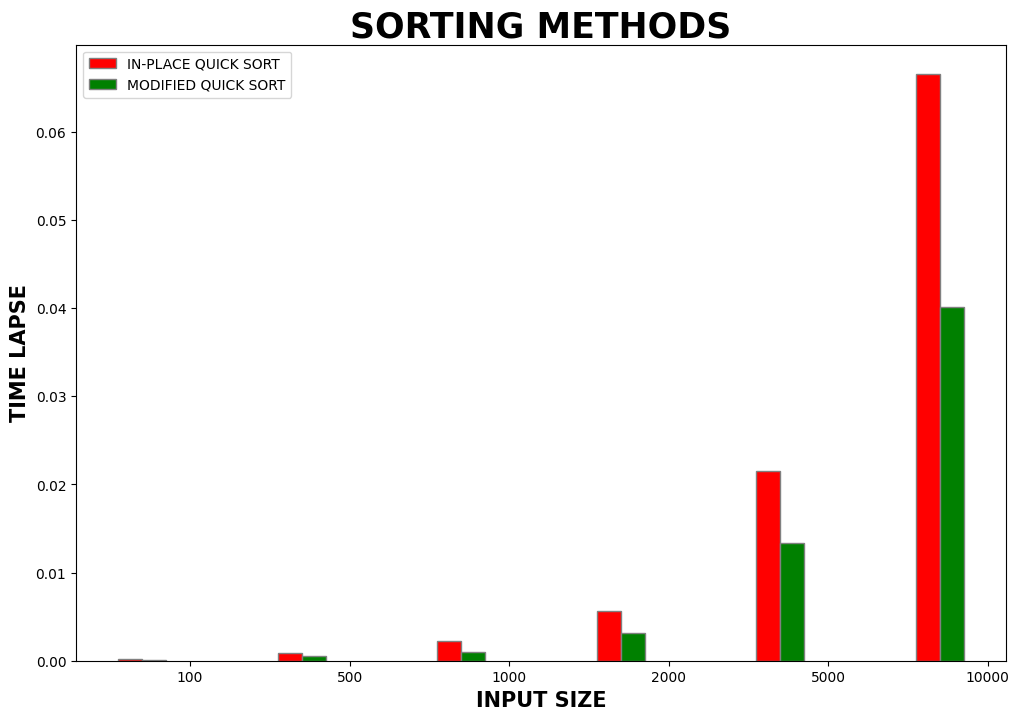

In [22]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]


fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, Total_execution[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, Total_execution[1], color='g', width=barWidth, edgecolor='grey', label='MODIFIED QUICK SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT SIZE', fontweight='bold', fontsize=15)
plt.ylabel('TIME LAPSE', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()





